# Malignant vs All

## Importing libraries

In [1]:
# Importing required libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

## Uploading file

In [2]:
# Read in data and display first 5 rows
df = pd.read_csv (r'/content/clinical_data.csv')
df.head()

,Patient ID,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy,Subject_Tag,binary_case1,binary_case2
0,P0215,L,NE,30.0,F,35.0,1.42,17.357667,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M
1,P0216,L,NE,55.0,M,49.0,1.57,19.879103,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M
2,P0218,L,BE,51.0,F,45.0,1.53,19.223376,Yes,No,No,No,No,0,0,NV,S,Malignant,M,M
3,P0221,L,E,32.0,F,47.0,1.52,20.342798,Yes,No,No,No,No,1,1,NV,S,Malignant,M,M
4,P0222,M,E,46.0,M,59.0,1.68,20.904195,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M


## Label Encoding

In [3]:
from sklearn import preprocessing
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['Socio_Economic Status']=le.fit_transform(df['Socio_Economic Status'])
df['Education Status']=le.fit_transform(df['Education Status'])
df['Sex']=le.fit_transform(df['Sex'])
df['Education Status']=le.fit_transform(df['Education Status'])
df['Observable_symptom']=le.fit_transform(df['Observable_symptom'])
df['Burning_sensation']=le.fit_transform(df['Burning_sensation'])
df['Observable_symptom']=le.fit_transform(df['Observable_symptom'])
df['Dental_pain']=le.fit_transform(df['Dental_pain'])
df['Medical_history']=le.fit_transform(df['Medical_history'])
df['Oral_Habits']=le.fit_transform(df['Oral_Habits'])
df['Dietary_Habits']=le.fit_transform(df['Dietary_Habits'])
df['Spicy/Non_Spicy']=le.fit_transform(df['Spicy/Non_Spicy'])
df['Subject_Tag']=le.fit_transform(df['Subject_Tag'])
df['binary_case1']=le.fit_transform(df['binary_case1'])
df['binary_case2']=le.fit_transform(df['binary_case2'])

## Data Preprocessing

### Filling NaN values

In [4]:
# DATA PREPROCESSING
# filling the unavailable categorical data with mode
col = df.columns.values.tolist()
#df_y.fillna(value=df_y.median(), inplace = True)
categorical = ["Socio_Economic Status","Education Status","Sex", "Observable_symptom","Burning_sensation","Dental_pain","Medical_history","Oral_Habits","Dietary_Habits","Spicy/Non_Spicy"]
#for c in col:
 # if c not in categorical:
  #  datainput[c].fillna(value=datainput[c].median(), inplace=True)
for c in categorical:
  df[c] = df[c].fillna(value=df[c].mode()[0])

In [5]:
numerical =["Age","Weight_kg","Height_metre","BMI_kg/metre2"]
for c in numerical:
 df[c].fillna(value=df[c].median(), inplace=True)

### Dropping non-useful x labels

In [6]:
df=df.drop(['Subject_Tag'],axis=1)
df=df.drop(['binary_case1'],axis=1)
df=df.drop(['Patient ID'],axis=1)

In [7]:
df

,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy,binary_case2
0,1,2,30.0,0,35.0,1.42,17.357667,1,0,0,0,1,2,2,0,1,0
1,1,2,55.0,1,49.0,1.57,19.879103,1,0,0,0,1,2,2,0,1,0
2,1,0,51.0,0,45.0,1.53,19.223376,1,0,0,0,0,0,0,0,1,0
3,1,1,32.0,0,47.0,1.52,20.342798,1,0,0,0,0,1,1,0,1,0
4,2,1,46.0,1,59.0,1.68,20.904195,1,0,0,0,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,3,55.0,0,55.0,1.42,27.276334,1,0,0,0,0,0,0,0,1,1
460,2,1,30.0,1,58.0,1.66,21.048048,1,0,0,0,1,2,2,0,1,1
461,2,1,37.0,1,60.0,1.72,20.281233,1,1,0,0,1,2,2,0,1,1
462,1,0,58.0,1,46.0,1.66,16.693279,1,0,0,0,1,2,2,0,1,1


In [8]:
df.groupby(['binary_case2']).count()

,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy
binary_case2,,,,,,,,,,,,,,,,
0,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
1,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390


In [10]:
df.drop(df.index[76:374], inplace=True)

In [11]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [12]:
y.shape

(166,)

### Feature Selection 

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [14]:
print(model.feature_importances_)

[0.05053131 0.0601348  0.16859922 0.03932513 0.14503905 0.14917773
 0.14739651 0.03391815 0.0232309  0.02373247 0.02548381 0.0259095
 0.0552546  0.05075203 0.00080129 0.00071352]


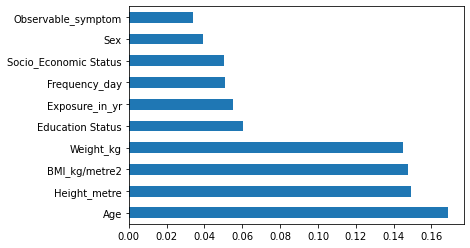

In [15]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [16]:
X=X.drop(['Medical_history'],axis=1)
X=X.drop(['Burning_sensation'],axis=1)
X=X.drop(['Dental_pain'],axis=1)
X=X.drop(['Oral_Habits'],axis=1)
X=X.drop(['Dietary_Habits'],axis=1)
X=X.drop(['Spicy/Non_Spicy'],axis=1)

### Standardisation of x label values

In [17]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [18]:
X.shape

(166, 10)

## Model Implementation

### Random Forests

In [19]:
d_trees = np.arange(1, 200)
train_accuracy = np.empty(len(d_trees))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
for i in (d_trees):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    y_pred = rfc.predict(X_test)
    #metrics.accuracy_score(b_test, y_pred)
    train_accuracy[i-1] = metrics.accuracy_score(y_test, y_pred)

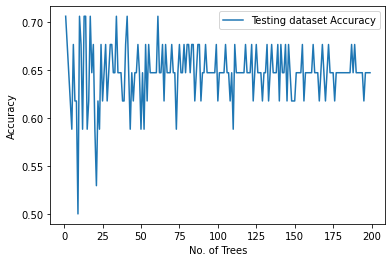

In [20]:
plt.plot(d_trees,train_accuracy, label = 'Testing dataset Accuracy')

 
plt.legend()
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy')

plt.show()

In [37]:
clf = RandomForestClassifier(random_state=3)

In [38]:
score_rf=cross_val_score(clf,X, y,cv=5)
print(score_rf)
print('avg',np.average(score_rf))

[0.73529412 0.39393939 0.57575758 0.72727273 0.75757576]
avg 0.6379679144385028


### Bagging

In [39]:
bg = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=1.0,random_state=2)

In [40]:
score_rf_=cross_val_score(bg,X, y,cv=5)
print(score_rf_)
print('avg',np.average(score_rf_))

[0.76470588 0.48484848 0.60606061 0.66666667 0.75757576]
avg 0.6559714795008912


### Adaboost

In [41]:
ad = AdaBoostClassifier(RandomForestClassifier(),learning_rate=0.01,random_state=4)

In [42]:
scorerf_=cross_val_score(ad,X, y,cv=5)
print(scorerf_)
print('avg',np.average(scorerf_))

[0.64705882 0.36363636 0.54545455 0.72727273 0.72727273]
avg 0.6021390374331551


### Gradient Boosting

In [49]:
model = GradientBoostingClassifier(random_state=3)

In [50]:
scoe_rf_=cross_val_score(model,X, y,cv=5)
print(scoe_rf_)
print('avg',np.average(scoe_rf_))

[0.55882353 0.42424242 0.57575758 0.66666667 0.60606061]
avg 0.5663101604278075


### SVM

In [51]:
clf= SVC(kernel='linear',probability=True,random_state=1)

In [52]:
sore_r_f_=cross_val_score(clf,X, y,cv=5)
print(sore_r_f_)
print('avg',np.average(sore_r_f_))

[0.67647059 0.54545455 0.72727273 0.63636364 0.75757576]
avg 0.6686274509803921


### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [54]:
modol = KNeighborsClassifier()

In [55]:
ore_r_f_=cross_val_score(modol,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

[0.47058824 0.51515152 0.60606061 0.6969697  0.54545455]
avg 0.5668449197860963


### ANN

In [56]:
clf_ = MLPClassifier(hidden_layer_sizes=(6,6),
                    max_iter = 60,
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [57]:
ore_r_f_=cross_val_score(clf_,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

Iteration 1, loss = 0.67327762
Iteration 2, loss = 0.65857241
Iteration 3, loss = 0.64652433
Iteration 4, loss = 0.63668957
Iteration 5, loss = 0.62787394
Iteration 6, loss = 0.62009381
Iteration 7, loss = 0.61342244
Iteration 8, loss = 0.60732738
Iteration 9, loss = 0.60121809
Iteration 10, loss = 0.59541543
Iteration 11, loss = 0.59002054
Iteration 12, loss = 0.58507110
Iteration 13, loss = 0.58003614
Iteration 14, loss = 0.57464194
Iteration 15, loss = 0.56909074
Iteration 16, loss = 0.56387376
Iteration 17, loss = 0.55887658
Iteration 18, loss = 0.55444798
Iteration 19, loss = 0.55034732
Iteration 20, loss = 0.54640514
Iteration 21, loss = 0.54249494
Iteration 22, loss = 0.53869359
Iteration 23, loss = 0.53489270
Iteration 24, loss = 0.53119415
Iteration 25, loss = 0.52784002
Iteration 26, loss = 0.52440290
Iteration 27, loss = 0.52118453
Iteration 28, loss = 0.51816286
Iteration 29, loss = 0.51482620
Iteration 30, loss = 0.51140694
Iteration 31, loss = 0.50761768
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 5, loss = 0.60742907
Iteration 6, loss = 0.59887667
Iteration 7, loss = 0.59165908
Iteration 8, loss = 0.58501462
Iteration 9, loss = 0.57921611
Iteration 10, loss = 0.57349029
Iteration 11, loss = 0.56792237
Iteration 12, loss = 0.56240562
Iteration 13, loss = 0.55681025
Iteration 14, loss = 0.55121209
Iteration 15, loss = 0.54599072
Iteration 16, loss = 0.54087641
Iteration 17, loss = 0.53594267
Iteration 18, loss = 0.53157025
Iteration 19, loss = 0.52769016
Iteration 20, loss = 0.52405313
Iteration 21, loss = 0.52065712
Iteration 22, loss = 0.51756182
Iteration 23, loss = 0.51435230
Iteration 24, loss = 0.51094974
Iteration 25, loss = 0.50732353
Iteration 26, loss = 0.50368925
Iteration 27, loss = 0.50010731
Iteration 28, loss = 0.49648107
Iteration 29, loss = 0.49273210
Iteration 30, loss = 0.48897749
Iteration 31, loss = 0.48525325
Iteration 32, loss = 0.48155839
Iteration 33, loss = 0.47820442
Iteration 34, loss = 0.47498686
Iteration 35, loss = 0.47198221
Iteration 36,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 58, loss = 0.43744644
Iteration 59, loss = 0.43470973
Iteration 60, loss = 0.43189150
Iteration 1, loss = 0.66655954
Iteration 2, loss = 0.64900017
Iteration 3, loss = 0.63523589
Iteration 4, loss = 0.62430231
Iteration 5, loss = 0.61481603
Iteration 6, loss = 0.60772682
Iteration 7, loss = 0.60199341
Iteration 8, loss = 0.59669002
Iteration 9, loss = 0.59206846
Iteration 10, loss = 0.58793213
Iteration 11, loss = 0.58397371
Iteration 12, loss = 0.57962898
Iteration 13, loss = 0.57547540
Iteration 14, loss = 0.57175121
Iteration 15, loss = 0.56798586
Iteration 16, loss = 0.56405692
Iteration 17, loss = 0.55999693
Iteration 18, loss = 0.55619846
Iteration 19, loss = 0.55269253
Iteration 20, loss = 0.54993936
Iteration 21, loss = 0.54736302
Iteration 22, loss = 0.54490856
Iteration 23, loss = 0.54257763
Iteration 24, loss = 0.54022895
Iteration 25, loss = 0.53768838
Iteration 26, loss = 0.53530780
Iteration 27, loss = 0.53279300
Iteration 28, loss = 0.52993900
Iteration 29, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
